### Loading Libraries and setting seed

In [1]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.random.seed(88)

### Loading data and dropping categorical + text features

In [2]:
# Load the data

df = pd.read_csv(r"/Users/leeminli/OneDrive - National University of Singapore/MIN LI NUS/Y3S1/DSA3101/Assignment 1 Project/FINAL DATASET/hotels_booking_reviews.csv")
#df = pd.read_csv(r"/Users/usman/Desktop/DSA3101/data/hotel_booking_reviews_final.csv")
# The dimension of data
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
# Print the first 5 rows
df['quarter'] = df['quarter'].astype('object')

df_model = df.drop(["review_title" ,"review_date","reviewer" , "hotel_name" , "hotel_avg_rating" ,
                "review_text" , "raw_review_text" , "hotel_type" , "total_spending"] , axis = 1)


df_model.head()

Dimension data: 1980 rows and 17 columns


,nationality,rating,quarter,nights_stayed,room_type,traveller_type,price_per_night,booking_freq
0,Singapore,10.000,1,2,Standard Double or Twin Room,Couple,99,1.000
1,United Kingdom,8.000,1,2,Standard Double or Twin Room,Solo traveller,99,1.000
2,Germany,8.000,1,1,Standard Single Room,Solo traveller,84,1.000
3,Hungary,9.000,1,1,Deluxe Double Room,Solo traveller,119,1.000
4,Germany,8.800,1,1,Standard Double or Twin Room,People with friends,99,1.000


### Feature engineering of traveller type variable
This was done to generalise travellers of group size > 2

In [3]:
# 'Recategorise 'People with friends' and 'Family with young children' as 'Group'

df_model['traveller_type'] = df_model['traveller_type'].str.replace('People with friends','Group')
df_model['traveller_type'] = df_model['traveller_type'].str.replace('Family with young children','Group')

In [4]:
# Get the types of travellers after recategorising

unique_trav_types = df_model.traveller_type.value_counts()
print(unique_trav_types)
# Dataset is more balanced than before

Couple            880
Group             665
Solo traveller    435
Name: traveller_type, dtype: int64


In [5]:
# categorical vars
df_model.select_dtypes('object').nunique()

nationality       99
quarter            4
room_type         75
traveller_type     3
dtype: int64

In [6]:
# Inspect the numerical variables
df_model.describe()

,rating,nights_stayed,price_per_night,booking_freq
count,1980.000,1980.000,1980.000,1980.000
mean,8.678,1.893,156.174,1.496
std,1.482,1.186,62.524,1.456
min,1.000,1.000,84.000,1.000
25%,8.000,1.000,108.000,1.000
50%,9.000,2.000,143.000,1.000
75%,10.000,2.000,178.500,1.000
max,10.000,16.000,1008.000,11.000


### Sampling
In this section, we randomnly sample 400 observations from each type of traveller. This is done to balance the classification of travellers type and prior analysis showed `Couples` type were in a significantly larger proportion

In [7]:
# Random sample 400 from each traveller_type to get a balanced sample

couple_df = df_model.loc[df_model['traveller_type'] == 'Couple'] # Extract rows with traveller_type = 'Couple'
couple_df.describe() #check no. of rows of 'Couples'
sample_400_couple_df = couple_df.sample(n=400) #random sample of 400 rows of couples
sample_400_couple_df.describe() #check no. of rows is 400


solo_df = df_model.loc[df_model['traveller_type'] == 'Solo traveller']
solo_df.describe() #check no. of rows of 'Solo traveller'
sample_400_solo_df = solo_df.sample(n=400) #random sample of 400 rows of Solo travellers
sample_400_solo_df.describe() #check no. of rows is 400


group_df = df_model.loc[df_model['traveller_type'] == 'Group']
group_df.describe() #check no. of rows of 'Group'
sample_400_group_df = group_df.sample(n=400) #random sample of 400 rows of group travellers
sample_400_group_df.describe() #check no. of rows is 400

,rating,nights_stayed,price_per_night,booking_freq
count,400.000,400.000,400.000,400.000
mean,8.607,1.958,162.102,1.405
std,1.650,1.146,59.515,1.395
min,1.000,1.000,99.000,1.000
25%,7.975,1.000,115.000,1.000
50%,9.000,2.000,144.000,1.000
75%,10.000,2.250,200.000,1.000
max,10.000,8.000,384.000,11.000


In [8]:
# Combine sampled dataset together
# This df will be the one used for clustering

df_model = pd.concat([sample_400_solo_df, sample_400_couple_df, sample_400_group_df], axis=0) #combine samples
original_df = df_model.copy()
df_model.head()

,nationality,rating,quarter,nights_stayed,room_type,traveller_type,price_per_night,booking_freq
3,Hungary,9.000,1,1,Deluxe Double Room,Solo traveller,119,1.000
340,United States,10.000,1,3,Budget Room with River View,Solo traveller,145,1.000
1615,United Kingdom,10.000,2,3,Superior Room,Solo traveller,190,4.000
1222,Switzerland,1.000,1,1,Superior Double or Twin Room,Solo traveller,158,1.000
102,Netherlands,8.300,2,1,Standard Double or Twin Room,Solo traveller,99,1.000


In [9]:
df_model = pd.concat([sample_400_solo_df, sample_400_couple_df, sample_400_group_df], axis=0) #combine samples
original_df = df_model.copy()
df_model.head()

,nationality,rating,quarter,nights_stayed,room_type,traveller_type,price_per_night,booking_freq
3,Hungary,9.000,1,1,Deluxe Double Room,Solo traveller,119,1.000
340,United States,10.000,1,3,Budget Room with River View,Solo traveller,145,1.000
1615,United Kingdom,10.000,2,3,Superior Room,Solo traveller,190,4.000
1222,Switzerland,1.000,1,1,Superior Double or Twin Room,Solo traveller,158,1.000
102,Netherlands,8.300,2,1,Standard Double or Twin Room,Solo traveller,99,1.000


In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [11]:
df_model.corr()

,rating,nights_stayed,price_per_night,booking_freq
rating,1.000,-0.034,0.179,0.069
nights_stayed,-0.034,1.000,-0.001,0.009
price_per_night,0.179,-0.001,1.000,0.065
booking_freq,0.069,0.009,0.065,1.000


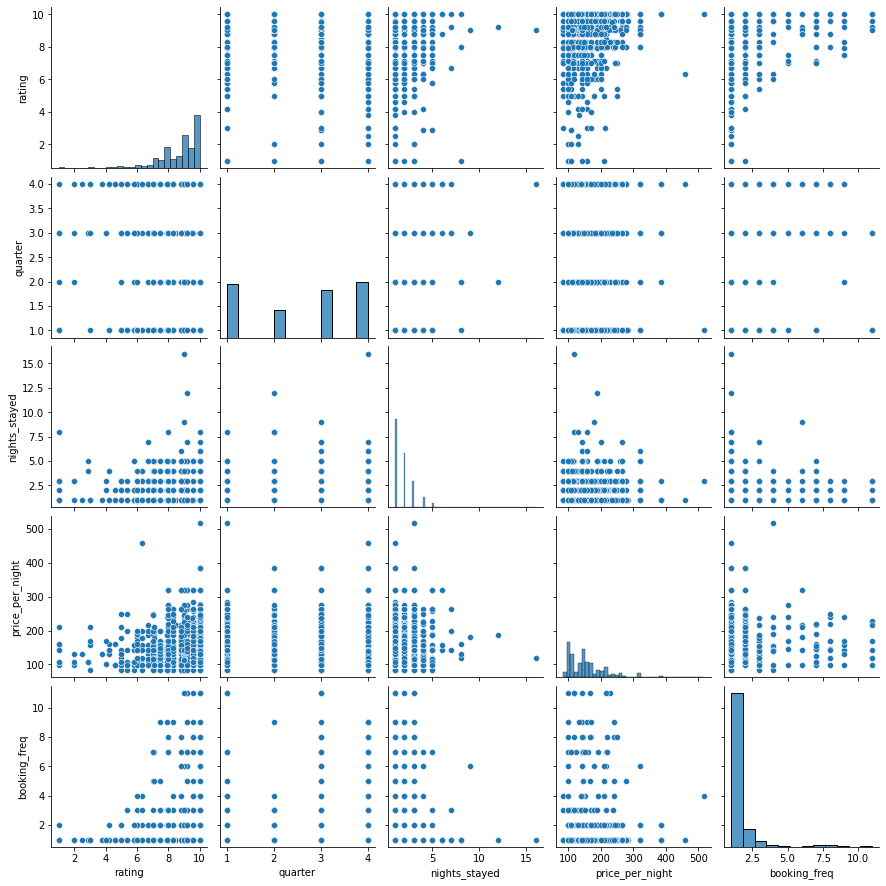

In [12]:
sns.pairplot(df_model)

<AxesSubplot:>

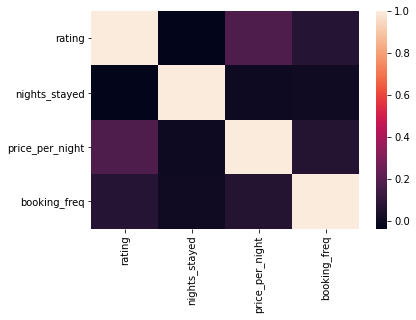

In [13]:
sns.heatmap(df_model.corr())

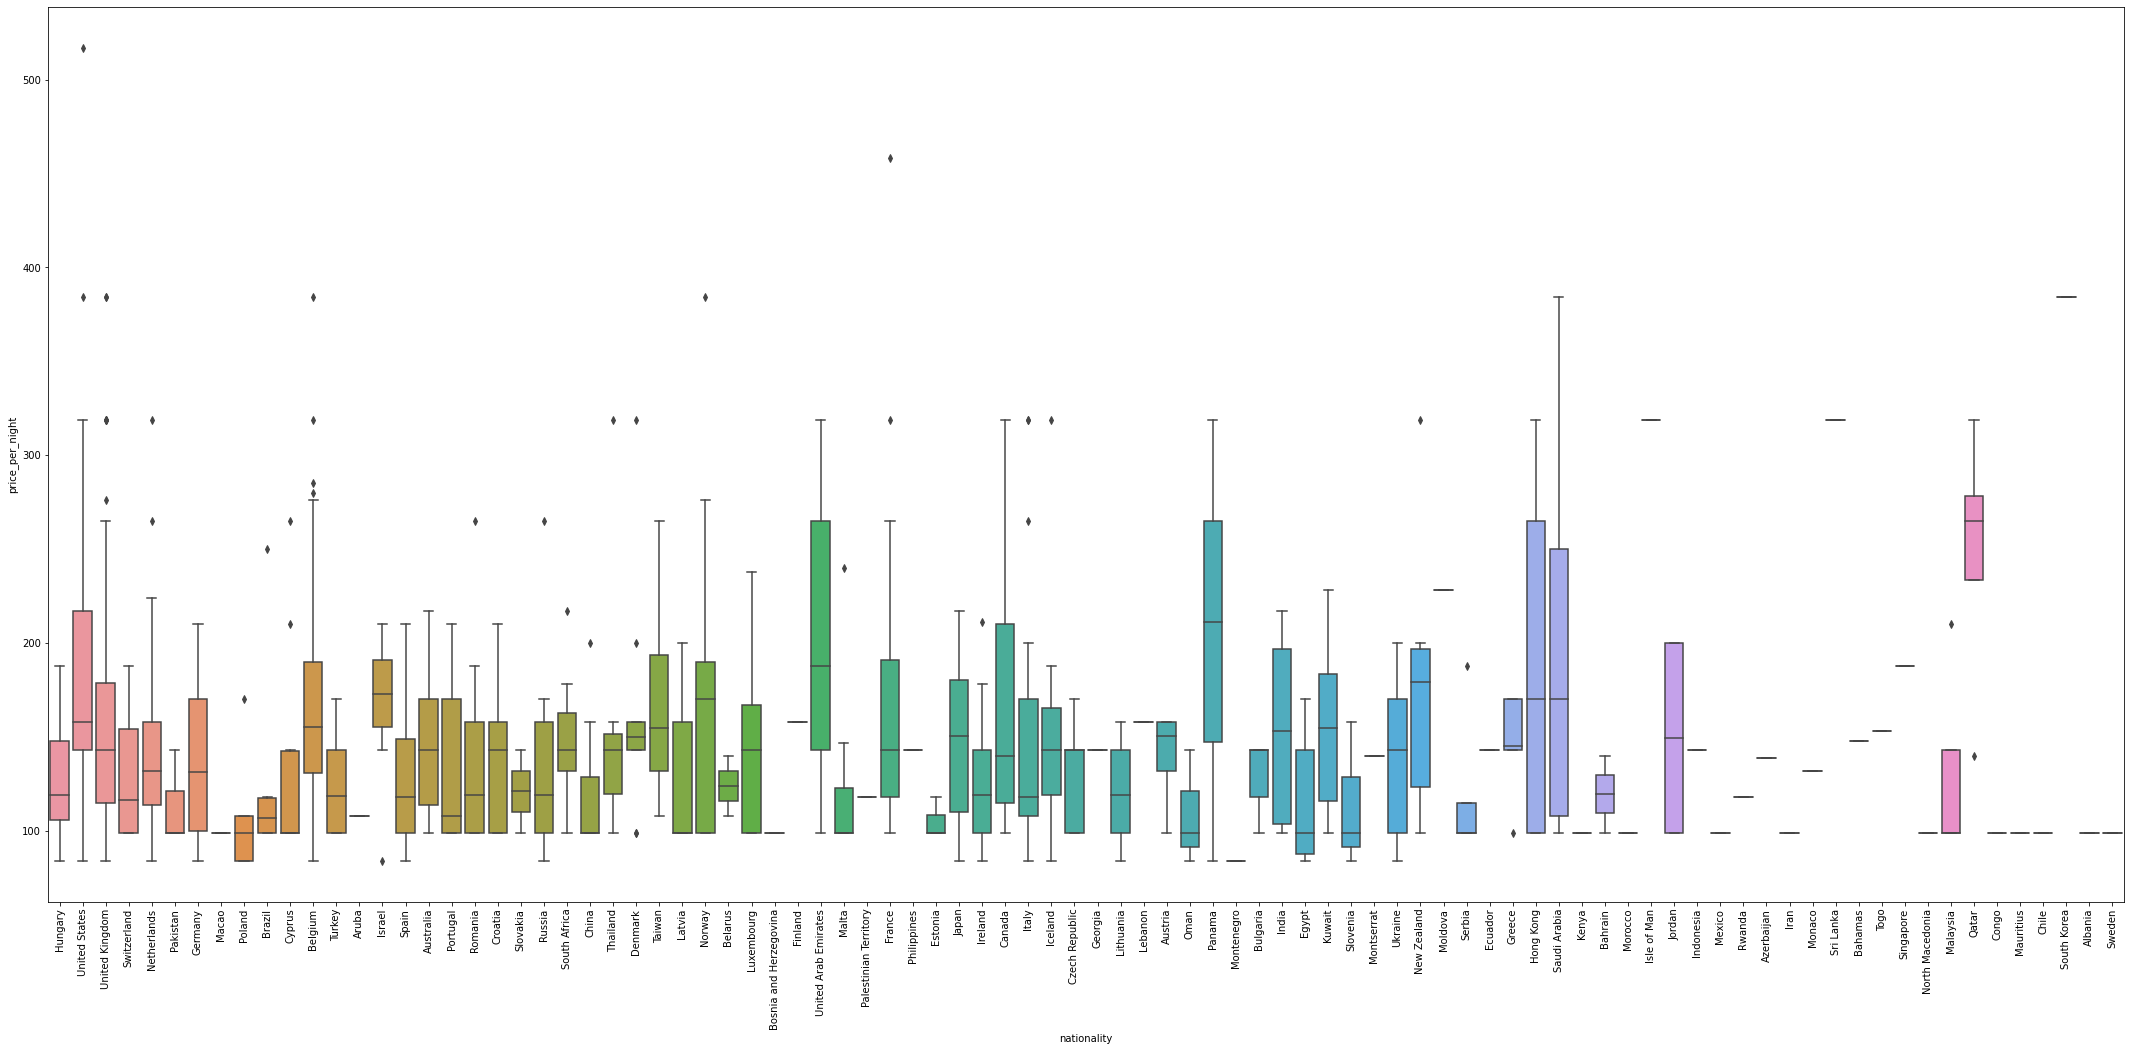

In [14]:
plt.rcParams["figure.figsize"] = [30.00, 15]
plt.rcParams["figure.autolayout"] = True

ax = sns.boxplot(df_model['nationality'] , df_model['price_per_night'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.rcParams.update({'font.size': 20})
plt.show()

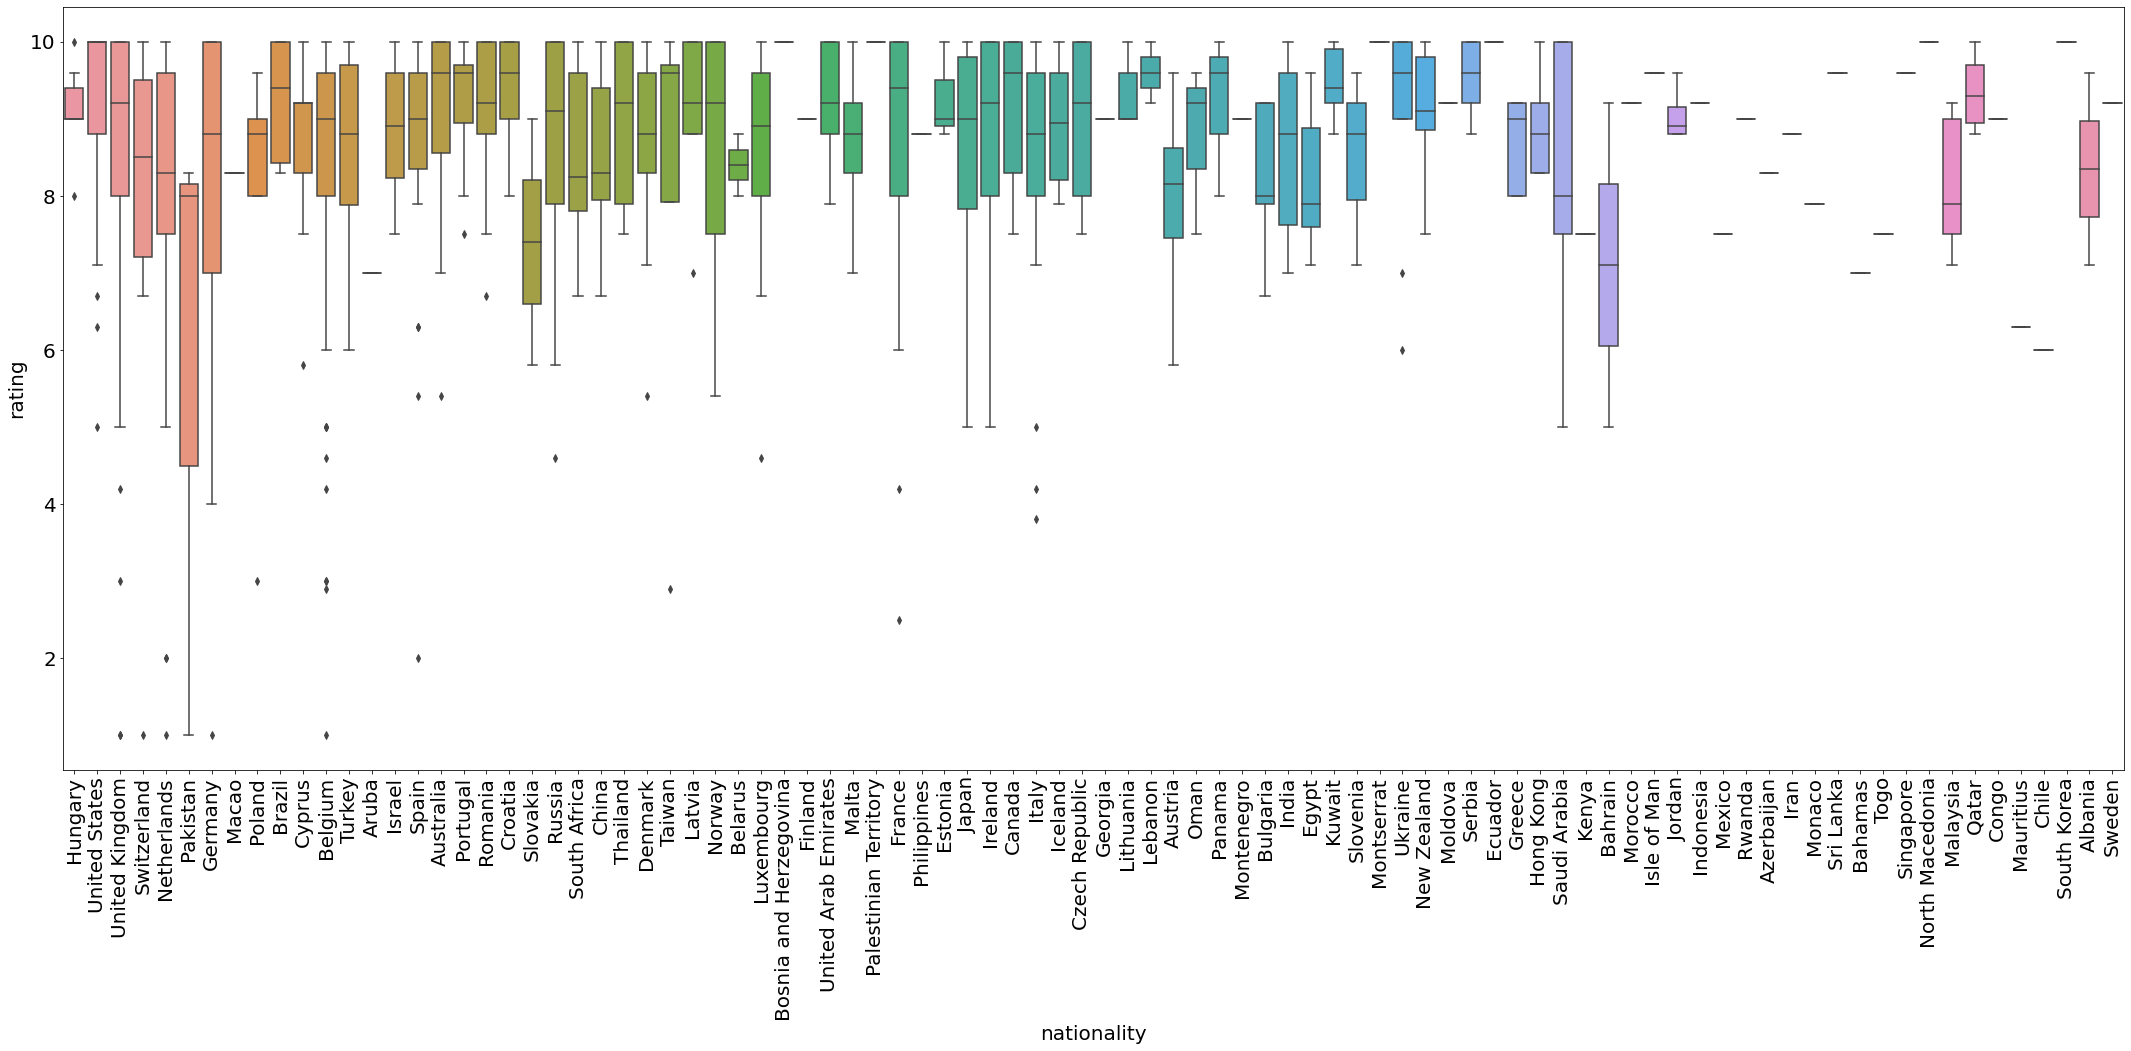

In [15]:
ax1 = sns.boxplot(df_model['nationality'] , df_model['rating'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

### Encoding of categorical variables

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_model2 = df_model
df_model2["nationality_enc"] = le.fit_transform(df_model2["nationality"])
df_model2["traveller_type_enc"] = le.fit_transform(df_model2["traveller_type"])
df_model2["room_type_enc"] = le.fit_transform(df_model2["room_type"])
df_model2.drop(["nationality" , "traveller_type" , "room_type"] , axis = 1 , inplace = True)
df_model2.head()

,rating,quarter,nights_stayed,price_per_night,booking_freq,nationality_enc,traveller_type_enc,room_type_enc
3,9.000,1,1,119,1.000,29,2,18
340,10.000,1,3,145,1.000,89,2,8
1615,10.000,2,3,190,4.000,88,2,63
1222,1.000,1,1,158,1.000,81,2,62
102,8.300,2,1,99,1.000,56,2,52


### Scaling of encoded categorical variables
This is to ensure the categorical variables are being weighted equally in terms of their distance from each centroid.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_model = scaler.fit_transform(df_model2)

In [18]:
scaled_df_model = pd.DataFrame(scaled_df_model , columns = df_model2.columns.values)
scaled_df_model.head()

,rating,quarter,nights_stayed,price_per_night,booking_freq,nationality_enc,traveller_type_enc,room_type_enc
0,0.217,-1.317,-0.743,-0.610,-0.319,-0.751,1.225,-1.158
1,0.879,-1.317,0.868,-0.139,-0.319,1.131,1.225,-1.696
2,0.879,-0.479,0.868,0.677,1.805,1.100,1.225,1.263
3,-5.080,-1.317,-0.743,0.097,-0.319,0.880,1.225,1.209
4,-0.247,-0.479,-0.743,-0.973,-0.319,0.096,1.225,0.671


In [19]:
scaled_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              1200 non-null   float64
 1   quarter             1200 non-null   float64
 2   nights_stayed       1200 non-null   float64
 3   price_per_night     1200 non-null   float64
 4   booking_freq        1200 non-null   float64
 5   nationality_enc     1200 non-null   float64
 6   traveller_type_enc  1200 non-null   float64
 7   room_type_enc       1200 non-null   float64
dtypes: float64(8)
memory usage: 75.1 KB


In [20]:
x = scaled_df_model.values

### Choosing eps parameter using the K-distance graph:
We used the below k distance graph from sklearn to find the optimal value of eps, which was found to be 0.035 (also from model iterations) and chose min_samples to be 4 according to the criteria that min_samples >= D+1 where D is the dimensions of the data (Ren, 2019) (here, we had 3 numerical variables).

In [21]:
from itertools import product
from sklearn.metrics import silhouette_score
eps_values = np.arange(0.05,2.05,0.05) # eps values to be investigated
min_samples = np.arange(2,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [22]:
DBSCAN_params

[(0.05, 2),
 (0.05, 3),
 (0.05, 4),
 (0.05, 5),
 (0.05, 6),
 (0.05, 7),
 (0.05, 8),
 (0.05, 9),
 (0.1, 2),
 (0.1, 3),
 (0.1, 4),
 (0.1, 5),
 (0.1, 6),
 (0.1, 7),
 (0.1, 8),
 (0.1, 9),
 (0.15000000000000002, 2),
 (0.15000000000000002, 3),
 (0.15000000000000002, 4),
 (0.15000000000000002, 5),
 (0.15000000000000002, 6),
 (0.15000000000000002, 7),
 (0.15000000000000002, 8),
 (0.15000000000000002, 9),
 (0.2, 2),
 (0.2, 3),
 (0.2, 4),
 (0.2, 5),
 (0.2, 6),
 (0.2, 7),
 (0.2, 8),
 (0.2, 9),
 (0.25, 2),
 (0.25, 3),
 (0.25, 4),
 (0.25, 5),
 (0.25, 6),
 (0.25, 7),
 (0.25, 8),
 (0.25, 9),
 (0.3, 2),
 (0.3, 3),
 (0.3, 4),
 (0.3, 5),
 (0.3, 6),
 (0.3, 7),
 (0.3, 8),
 (0.3, 9),
 (0.35000000000000003, 2),
 (0.35000000000000003, 3),
 (0.35000000000000003, 4),
 (0.35000000000000003, 5),
 (0.35000000000000003, 6),
 (0.35000000000000003, 7),
 (0.35000000000000003, 8),
 (0.35000000000000003, 9),
 (0.4, 2),
 (0.4, 3),
 (0.4, 4),
 (0.4, 5),
 (0.4, 6),
 (0.4, 7),
 (0.4, 8),
 (0.4, 9),
 (0.45, 2),
 (0.45, 3),


In [23]:
Data_DBSCAN = scaled_df_model

### Plot to decide the epsilon value 
The below plot shows how the distance of centroids vary with epsilon value. Choosing an appropriate epsilon value will allow us to maximise the number of clusters formed and give properties of each cluster

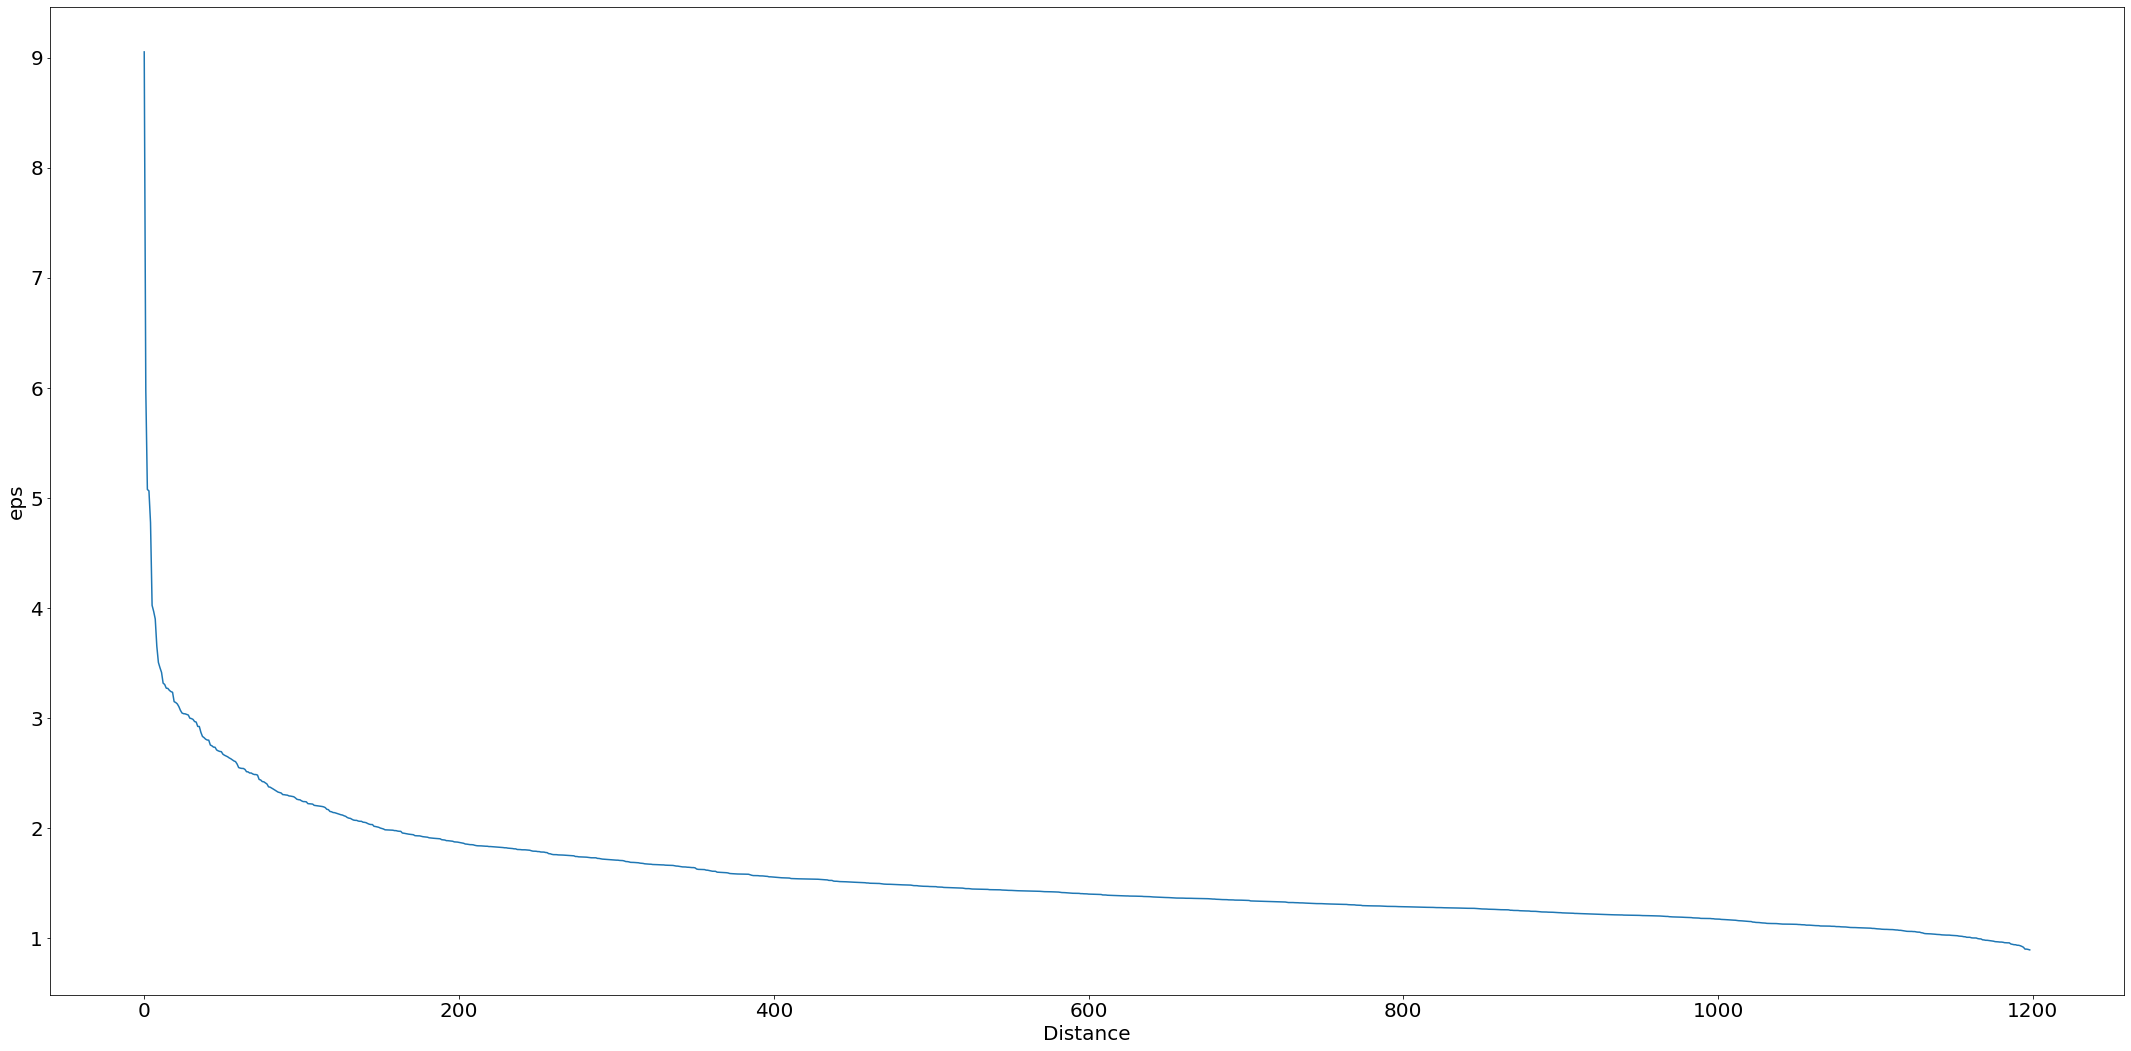

In [24]:
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [45]:
from sklearn.cluster import DBSCAN
dbs_1= DBSCAN(eps=1.4, min_samples=9)
results = dbs_1.fit(Data_DBSCAN).labels_
dataframe = pd.DataFrame(results)
dataframe[0].unique()

array([ 0, -1])

### Visualize DBSCAN clustering 

 0    941
-1    259
Name: Cluster_id_DBSCAN, dtype: int64


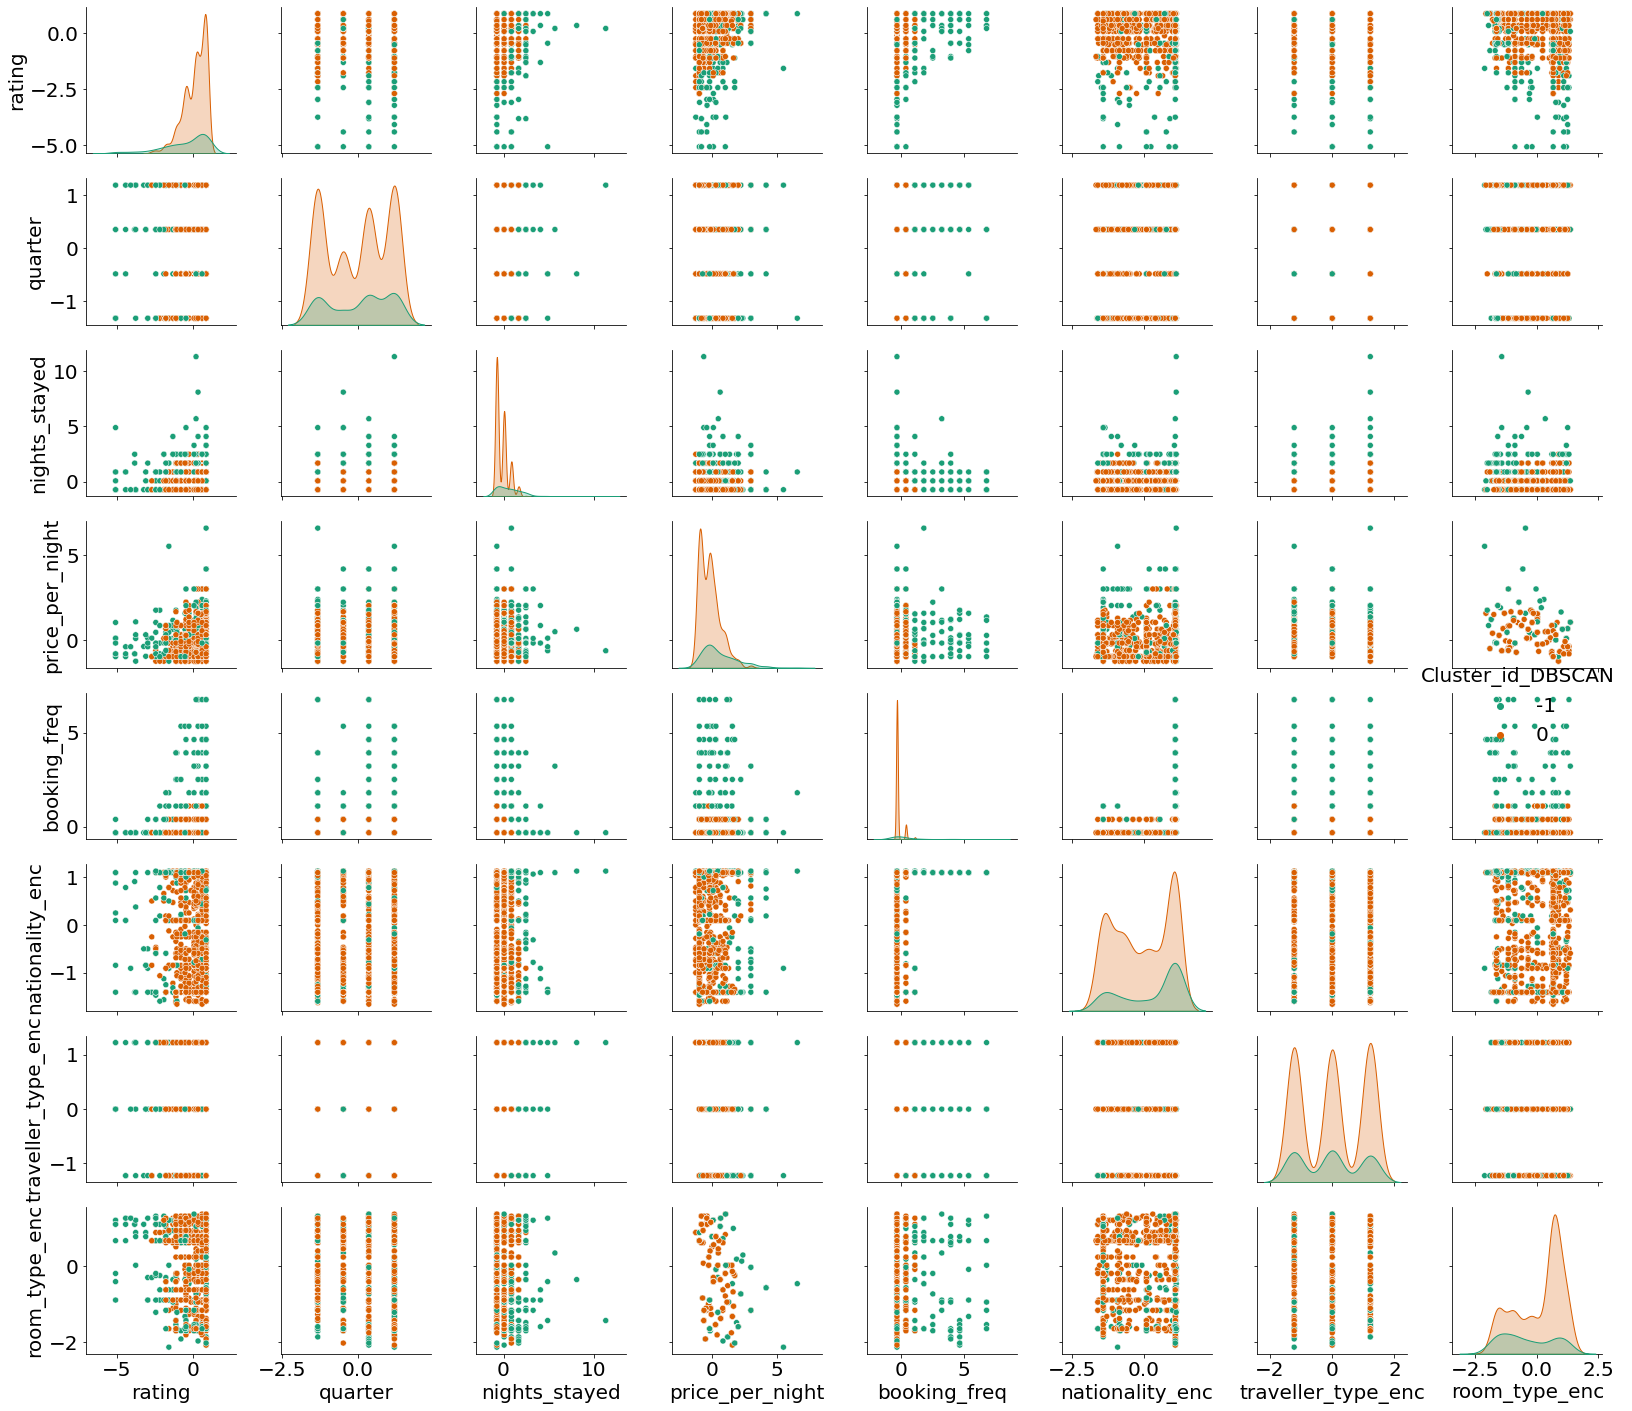

In [46]:
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster_id_DBSCAN']=results
print (df_DBSCAN['Cluster_id_DBSCAN'].value_counts())
sns_plot = sns.pairplot(df_DBSCAN,hue='Cluster_id_DBSCAN',palette='Dark2',diag_kind='kde')
plt.savefig("DBSCAN.png")

### Output

In [ ]:
df_DBSCAN.head(20)